In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [3]:
# Load JSON file and extract only the "category" and "date" fields
data = []
with open('arxiv-metadata-oai-snapshot.json', 'r') as f:
	for line in tqdm(f):
		json_data = json.loads(line)
		categories = json_data.get("categories")
		date = json_data.get("versions", [{}])[0].get("created")
		data.append({"categories": categories, "date": date})

# Create a DataFrame from the extracted data
docs = pd.DataFrame(data)

# Convert date column to datetime format
docs["date"] = pd.to_datetime(docs["date"])

2408075it [00:15, 152017.35it/s]


In [4]:
# Create a "category_array" column that holds the categories as an array
docs["category_array"] = docs["categories"].str.split()

In [5]:
# Create a new DataFrame that contains only the unique categories in the dataset
unique_categories = [];

for category in docs.categories:
    for cat in category.split():
        if cat not in unique_categories:
            unique_categories.append(cat)
unique_categories = pd.DataFrame(unique_categories, columns=["category"])
print(unique_categories)

           category
0            hep-ph
1           math.CO
2             cs.CG
3    physics.gen-ph
4           math.CA
..              ...
171         chem-ph
172        plasm-ph
173         mtrl-th
174          cmp-lg
175        supr-con

[176 rows x 1 columns]


In [7]:
# Create a year column with only the year from the date column
docs["year"] = docs["date"].dt.year

In [8]:
# Select the "category_main" to be the first category from the "category_array" column
# This is necessary because there are some rows that have multiple categories
docs["category_main"] = docs["category_array"].str[0]

In [9]:
# Group by year and category
grouped_by_year_category = docs.groupby(["year", "category_main"])

# Count occurrences within each group
paper_counts = grouped_by_year_category.size().unstack()

# Fill missing values with 0 
paper_counts.fillna(0, inplace=True)

# Uncomment to print the resulting table
# print(paper_counts)

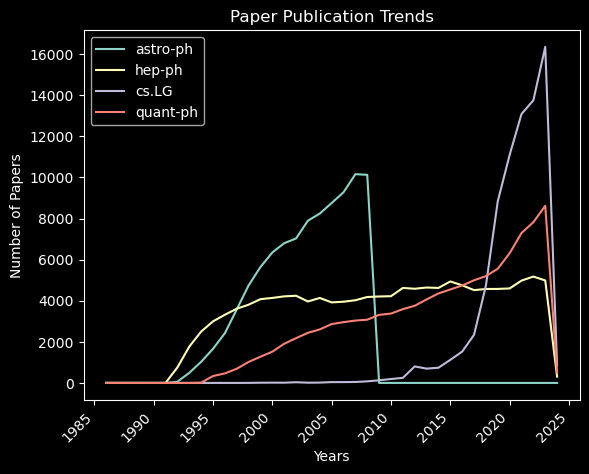

In [12]:
# The topics to plot the trend graph for
topics = ["astro-ph", "hep-ph", "cs.LG", "quant-ph"]

# Extract and plot the data for the chosen topics
for topic in topics:
    plt.plot(paper_counts.index, paper_counts[topic], label=topic)

# Customize the plot with labels and title
plt.xlabel("Years")
plt.ylabel("Number of Papers")
plt.title("Paper Publication Trends")
plt.legend()

# Display the plot
plt.xticks(rotation=45, ha="right")
plt.style.use("dark_background")
plt.show()